Load and display arrays from EvaluationData/evaluation_datasets/level1/data1.mat.

Loading: d:\010_CodePrograms\E\EIT_KTC2023\EvaluationData\evaluation_datasets\level1\data1.mat
Keys: ['Inj', 'Mpat', 'Uel']
Inj: dtype=float64, shape=(32, 76)
Mpat: dtype=int16, shape=(32, 31)
Uel: dtype=float64, shape=(2356, 1)


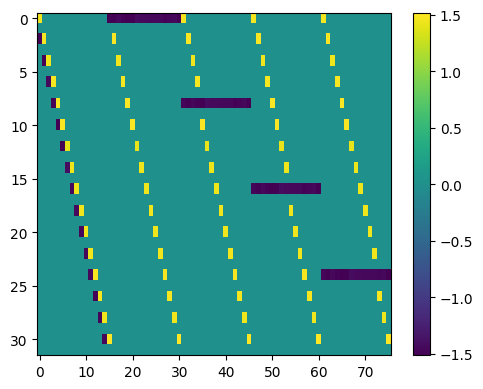

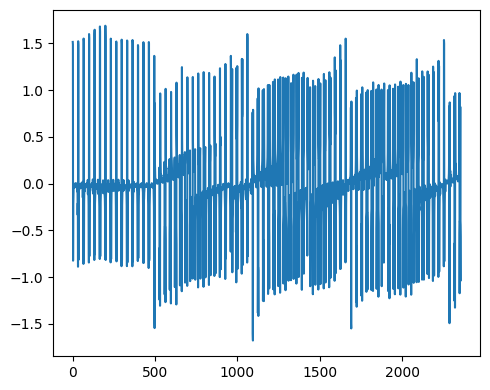

In [3]:
from pathlib import Path
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# Locate project root (folder containing AGENTS.md)
def find_project_root(start: Path) -> Path:
    for p in [start, *start.parents]:
        if (p / 'AGENTS.md').exists():
            return p
    return start

nb_dir = Path.cwd()
root = find_project_root(nb_dir)
data_path = root / 'EvaluationData' / 'evaluation_datasets' / 'level1' / 'data1.mat'
print(f'Loading: {data_path}')

mat = sio.loadmat(str(data_path))
# Filter out meta keys starting with '__'
data_keys = [k for k in mat.keys() if not k.startswith('__')]
print('Keys:', data_keys)

# Inspect shapes and dtypes
for k in data_keys:
    v = mat[k]
    try:
        shape = v.shape
    except AttributeError:
        shape = 'N/A'
    print(f"{k}: dtype={getattr(v, 'dtype', type(v))}, shape={shape}")

# Helper to display an array (1D -> line, 2D -> image)
def show_array(arr):
    a = np.array(arr)
    plt.figure(figsize=(5, 4))
    if a.ndim == 1:
        plt.plot(a)
    else:
        a2 = np.squeeze(a)
        if a2.ndim == 1:
            plt.plot(a2)
        else:
            plt.imshow(a2, cmap='viridis', aspect='auto')
            plt.colorbar()
    plt.tight_layout()
    plt.show()

# Display first available 2D (or 1D) array
shown = False
for k in data_keys:
    v = mat[k]
    if isinstance(v, np.ndarray) and v.ndim >= 1:
        show_array(v)
        shown = True
        break

# If Uel exists, show it explicitly as well
if 'Uel' in mat and isinstance(mat['Uel'], np.ndarray):
    show_array(mat['Uel'])